# Area 51 to try out code

In [1]:
import socket as socket
import os as os
import sys as sys
import numpy as np
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())

sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

compute-a-17-59.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


### The classic example:
Should be LL -26156.062

In [20]:
%%time
h = HMM_Full(folder_in="./output/simulated/undermodel/sim5/", l_model="simulated", t_model="standard", 
                 e_model="haploid_gl", h_model = "FiveStateFast",
                 output=True, load=True)
h.t_obj.set_params(ibd_in = 0.001, ibd_out = 0.001, ibd_jump = 0.1)
post, fwd, bwd, tot_ll = h.run_fwd_bwd()

Reference Number: 4
Memory Usage Full:
Memory Usage: 142.692352 mB
Total Log likelihood: -26372.230
CPU times: user 111 ms, sys: 3.58 ms, total: 115 ms
Wall time: 111 ms


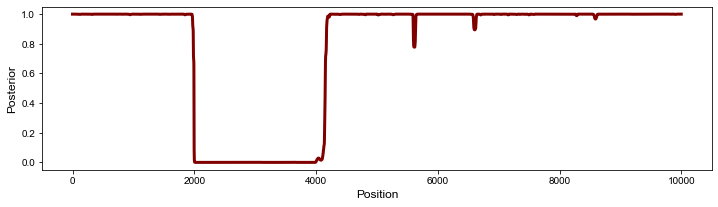

In [21]:
plot_posterior(post=post, state=0, fs_l=12, show=True)

Saved to ./figs/dumpster/5state_simulated.png


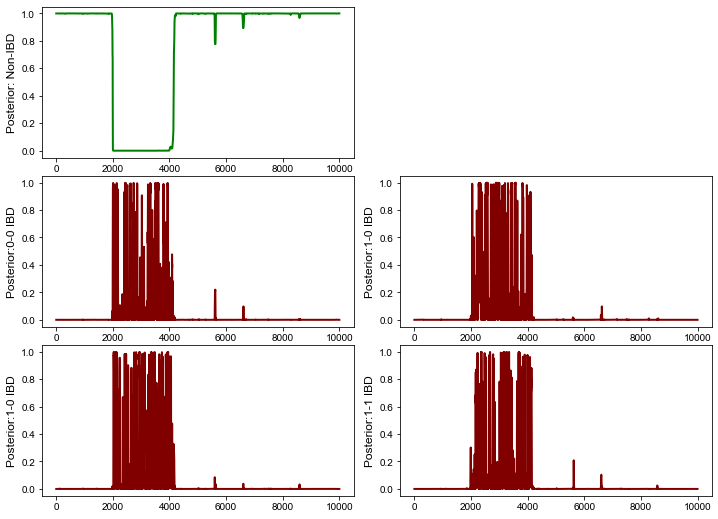

In [26]:
plot_posterior_panel(post=post, savepath="./figs/dumpster/5state_simulated.png", lw=2)

Saved to ./figs/dumpster/5state_simulated_zoom.png


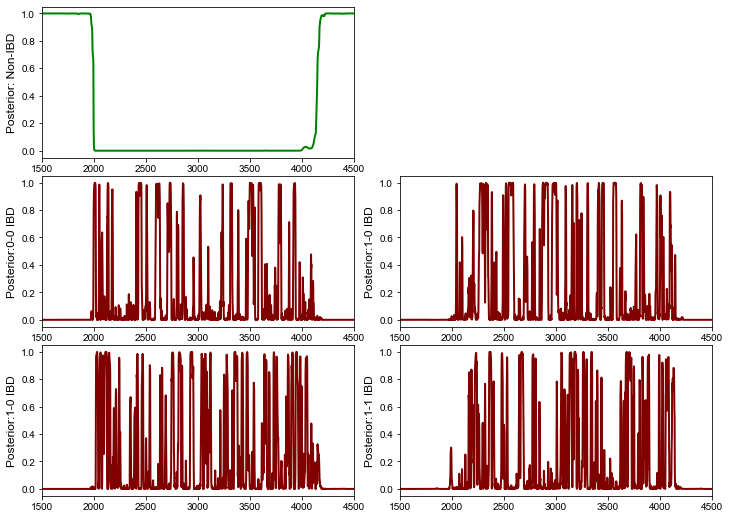

In [27]:
plot_posterior_panel(post=post, 
                     savepath="./figs/dumpster/5state_simulated_zoom.png", xlim=[1500,4500], lw=2)